In [1]:
#Name:- Anmol Pandey
#Enrolment No.:- E22CSEU1069
#Batch:- 36

import numpy as np
import pandas as pd
import math

In [2]:
data = [
    {"GPA": 3.8, "SAT": 1450, "Extracurricular": "Yes", "Recommendation": "Strong", "Admission": "Admitted"},
    {"GPA": 3.2, "SAT": 1300, "Extracurricular": "No", "Recommendation": "Weak", "Admission": "Not Admitted"},
    {"GPA": 4.0, "SAT": 1500, "Extracurricular": "Yes", "Recommendation": "Strong", "Admission": "Admitted"},
    {"GPA": 2.5, "SAT": 1200, "Extracurricular": "Yes", "Recommendation": "Weak", "Admission": "Not Admitted"},
    {"GPA": 3.6, "SAT": 1400, "Extracurricular": "No", "Recommendation": "Strong", "Admission": "Admitted"}
]
df = pd.DataFrame(data)

In [3]:
df.head()

,GPA,SAT,Extracurricular,Recommendation,Admission
0,3.8,1450,Yes,Strong,Admitted
1,3.2,1300,No,Weak,Not Admitted
2,4.0,1500,Yes,Strong,Admitted
3,2.5,1200,Yes,Weak,Not Admitted
4,3.6,1400,No,Strong,Admitted


In [4]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        self.value = value

In [5]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        self.root = None
        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        
        best_split = {}
        max_info_gain = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):    
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [6]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=69)

In [8]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_0 <= 3.2 ? 0.5
 left:Not Admitted
 right:Admitted


In [9]:
Y_pred = classifier.predict(X_test) 
Y_pred

['Admitted']

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

1.0

In [11]:
X_test

array([[3.8, 1450, 'Yes', 'Strong']], dtype=object)

In [12]:
# Prediction for my test instance given in question
classifier.predict(np.array([[3.5, 1350, 'Yes', 'Weak']], dtype=object))

['Admitted']

In [13]:
classifier.predict(np.array([[3.2, 1300, 'No', 'Weak']], dtype=object))

['Not Admitted']

In [14]:
#Prediction using library
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
data2 = [
    {"GPA": 3.8, "SAT": 1450, "Extracurricular": "Yes", "Recommendation": "Strong", "Admission": "Admitted"},
    {"GPA": 3.2, "SAT": 1300, "Extracurricular": "No", "Recommendation": "Weak", "Admission": "Not Admitted"},
    {"GPA": 4.0, "SAT": 1500, "Extracurricular": "Yes", "Recommendation": "Strong", "Admission": "Admitted"},
    {"GPA": 2.5, "SAT": 1200, "Extracurricular": "Yes", "Recommendation": "Weak", "Admission": "Not Admitted"},
    {"GPA": 3.6, "SAT": 1400, "Extracurricular": "No", "Recommendation": "Strong", "Admission": "Admitted"}
]
df2 = pd.DataFrame(data2)

In [16]:
label_encoder = LabelEncoder()
df2['Extracurricular'] = label_encoder.fit_transform(df2['Extracurricular'])
df2['Recommendation'] = label_encoder.fit_transform(df2['Recommendation'])
df2['Admission'] = label_encoder.fit_transform(df2['Admission'])

In [17]:
df2['Recommendation'] = df2['Recommendation'].map({0: 1, 1: 0})
df2['Admission'] = df2['Admission'].map({0: 1, 1: 0})

In [18]:
df2.head()   

,GPA,SAT,Extracurricular,Recommendation,Admission
0,3.8,1450,1,1,1
1,3.2,1300,0,0,0
2,4.0,1500,1,1,1
3,2.5,1200,1,0,0
4,3.6,1400,0,1,1


In [19]:
X_2 = df2.drop('Admission', axis=1)
y_2 = df2['Admission']

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [22]:
X_test2

,GPA,SAT,Extracurricular,Recommendation
1,3.2,1300,0,0


In [23]:
predictions = clf.predict(X_test2)

In [24]:
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


[Text(0.5, 0.75, 'x[1] <= 1300.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

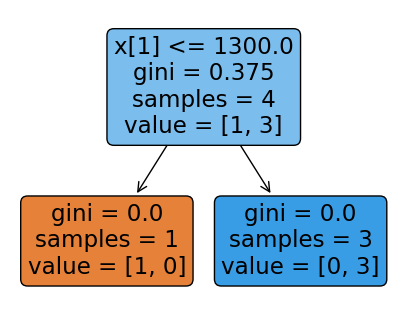

In [25]:
fig = plt.figure(figsize=(5, 4))
tree.plot_tree(clf, filled=True, rounded=True)